In [9]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
import shutil
from imutils import paths
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
'''
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
'''
# Any results you write to the current directory are saved as output.

"\nimport os\nfor dirname, _, filenames in os.walk('/kaggle/input'):\n    for filename in filenames:\n        print(os.path.join(dirname, filename))\n"

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
covid_dataset_path = '/content/drive/My Drive/covid-chest-xray'
# construct the path to the metadata CSV file and load it
csvPath = os.path.sep.join([covid_dataset_path, "metadata.csv"])
df = pd.read_csv(csvPath)

In [0]:

for (i, row) in df.iterrows():
    # if (1) the current case is not COVID-19 or (2) this is not
    # a 'PA' view, then ignore the row
    if row["finding"] != "COVID-19" or row["view"] != "PA":
        continue

    # build the path to the input image file
    imagePath = os.path.sep.join([covid_dataset_path, "images", row["filename"]])

    # if the input image file does not exist (there are some errors in
    # the COVID-19 metadeta file), ignore the row
    if not os.path.exists(imagePath):
        continue

    # extract the filename from the image path and then construct the
    # path to the copied image file
    filename = row["filename"].split(os.path.sep)[-1]
    outputPath = os.path.sep.join(["/content/drive/My Drive/covid_new", filename])

    # copy the image
    shutil.copy2(imagePath, outputPath)

In [0]:

def ceildiv(a, b):
    return -(-a // b)

def plots_from_files(imspaths, figsize=(10,5), rows=1, titles=None, maintitle=None):
    """Plot the images in a grid"""
    f = plt.figure(figsize=figsize)
    if maintitle is not None: plt.suptitle(maintitle, fontsize=10)
    for i in range(len(imspaths)):
        sp = f.add_subplot(rows, ceildiv(len(imspaths), rows), i+1)
        sp.axis('Off')
        if titles is not None: sp.set_title(titles[i], fontsize=16)
        img = plt.imread(imspaths[i])
        plt.imshow(img)

In [0]:
covid_images = list(paths.list_images("/content/drive/My Drive/covid_new"))

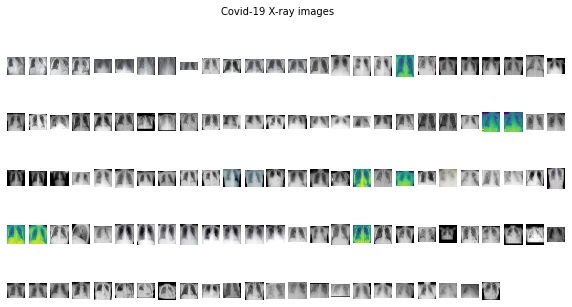

In [13]:
plots_from_files(covid_images, rows=5, maintitle="Covid-19 X-ray images")

In [0]:
import os
cnt=0;
for files in {'COVID-19','NORMAL','Viral Pneumonia'}:
    for file in os.listdir(os.path.join('/content/drive/My Drive/COVID-19 Radiography Database',files)):
        cnt+=1
print('Total Images: {}'.format(cnt))

Total Images: 2920


In [0]:
import matplotlib.pyplot as plt
import cv2

normal = cv2.imread('/content/drive/My Drive/COVID-19 Radiography Database/NORMAL/NORMAL (387).png')

covid = cv2.imread('/content/drive/My Drive/COVID-19 Radiography Database/COVID-19/COVID-19(147).png')

pneumonia = cv2.imread('/content/drive/My Drive/COVID-19 Radiography Database/Viral Pneumonia/Viral Pneumonia (1130).png')

KeyboardInterrupt: ignored

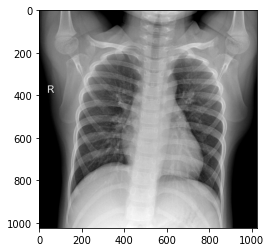

In [0]:
plt.imshow(normal)

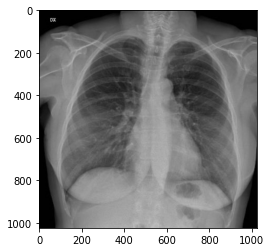

In [0]:
plt.imshow(covid)

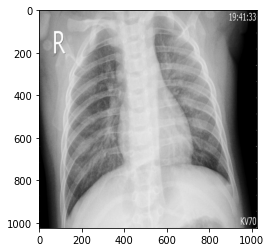

In [0]:
plt.imshow(pneumonia)

In [0]:
os.mkdir('/content/drive/My Drive/covid_classification')
#os.mkdir('/content/drive/My Drive/covid_classification/test')

In [0]:
os.mkdir('/content/drive/My Drive/covid_classification/train')
os.mkdir('/content/drive/My Drive/covid_classification/test')

In [0]:
import shutil
def copytree(src, dst, symlinks=False, ignore=None):
    if not os.path.exists(dst):
        os.makedirs(dst)
    for item in os.listdir(src):
        s = os.path.join(src, item)
        d = os.path.join(dst, item)
        if os.path.isdir(s):
            copytree(s, d, symlinks, ignore)
        else:
            if not os.path.exists(d) or os.stat(s).st_mtime - os.stat(d).st_mtime > 1:
                shutil.copy2(s, d)
                
copytree('/content/drive/My Drive/COVID-19 Radiography Database/', '/content/drive/My Drive/covid_classification/train')

In [0]:
cnt=0
os.listdir('/content/drive/My Drive/covid_classification/train')
for file in {'COVID-19', 'NORMAL', 'Viral Pneumonia'}:
    for files in os.listdir(os.path.join('/content/drive/My Drive/covid_classification/train/',file)):
        cnt+=1
cnt

2334

In [0]:
os.remove('/content/drive/My Drive/covid_classification/train/COVID-19.metadata.xlsx')
os.remove('/content/drive/My Drive/covid_classification/train/README.md.txt')
os.remove('/content/drive/My Drive/covid_classification/train/Viral Pneumonia.matadata.xlsx')
os.remove('/content/drive/My Drive/covid_classification/train/NORMAL.metadata.xlsx')

In [0]:
# moving 20 percent data to test folder
src = '/content/drive/My Drive/covid_classification/train'
dst = '/content/drive/My Drive/covid_classification/test'
#os.mkdir('/content/drive/My Drive/covid_classification/test/COVID-19')
#os.mkdir('/content/drive/My Drive/covid_classification/test/Viral Pneumonia')
#os.mkdir('/content/drive/My Drive/covid_classification/test/NORMAL')

for folders in os.listdir(src):
    num_files = len(os.listdir(os.path.join(src,folders)))
    cut_length = int(num_files*0.2)
    cnt=0
    for files in os.listdir(os.path.join(src, folders)):
        shutil.move(os.path.join(src, folders, files), os.path.join(dst, folders, files))
        if(cnt==cut_length):
            break
        cnt+=1

In [0]:
#os.mkdir('/content/drive/My Drive/covid_classification/val')
# moving 10 percent data to val folder
src = '/content/drive/My Drive/covid_classification/test'
dst = '/content/drive/My Drive/covid_classification/val'
os.mkdir('/content/drive/My Drive/covid_classification/val/COVID-19')
os.mkdir('/content/drive/My Drive/covid_classification/val/Viral Pneumonia')
os.mkdir('/content/drive/My Drive/covid_classification/val/NORMAL')

for folders in os.listdir(src):
    num_files = len(os.listdir(os.path.join(src,folders)))
    cut_length = int(num_files*0.5)
    cnt=0
    for files in os.listdir(os.path.join(src, folders)):
        shutil.move(os.path.join(src, folders, files), os.path.join(dst, folders, files))
        if(cnt==cut_length):
            break
        cnt+=1

In [0]:
import os
import shutil
src = '/content/drive/My Drive/Bacteria'
dst = '/content/drive/My Drive/covid_classification/train/Viral Pneumonia'
num_files = len(os.listdir(src))

cut_length = int(num_files*0.2)
cnt=0
for files in os.listdir(src):
    shutil.move(os.path.join(src, files), os.path.join(dst, files))
    if(cnt==cut_length):
        break
    cnt+=1
'''
for folders in os.listdir(src):
    num_files = len(os.listdir(os.path.join(src,folders)))
    cut_length = int(num_files*0.2)
    cnt=0
    for files in os.listdir(os.path.join(src, folders)):
        shutil.move(os.path.join(src, folders, files), os.path.join(dst, folders, files))
        if(cnt==cut_length):
            break
        cnt+=1
'''

'\nfor folders in os.listdir(src):\n    num_files = len(os.listdir(os.path.join(src,folders)))\n    cut_length = int(num_files*0.2)\n    cnt=0\n    for files in os.listdir(os.path.join(src, folders)):\n        shutil.move(os.path.join(src, folders, files), os.path.join(dst, folders, files))\n        if(cnt==cut_length):\n            break\n        cnt+=1\n'

In [0]:
src = '/content/drive/My Drive/Bacteria'
dst = '/content/drive/My Drive/covid_classification/val/Viral Pneumonia'
num_files = len(os.listdir(src))

cut_length = int(num_files*0.05)
cnt=0
for files in os.listdir(src):
    shutil.move(os.path.join(src, files), os.path.join(dst, files))
    if(cnt==cut_length):
        break
    cnt+=1

In [0]:
src = '/content/drive/My Drive/Bacteria'
dst = '/content/drive/My Drive/covid_classification/test/Viral Pneumonia'
num_files = len(os.listdir(src))

cut_length = int(num_files*0.05)
cnt=0
for files in os.listdir(src):
    shutil.move(os.path.join(src, files), os.path.join(dst, files))
    if(cnt==cut_length):
        break
    cnt+=1

In [14]:
src = '/content/drive/My Drive/covid_new'
dst = '/content/drive/My Drive/covid_classification/train/COVID-19'
num_files = len(os.listdir(src))

cut_length = int(num_files*0.5)
cnt=0
for files in os.listdir(src):
    shutil.move(os.path.join(src, files), os.path.join(dst, files))
    if(cnt==cut_length):
        break
    cnt+=1
print(cnt)

63


In [15]:
src = '/content/drive/My Drive/covid_new'
dst = '/content/drive/My Drive/covid_classification/val/COVID-19'
num_files = len(os.listdir(src))

cut_length = int(num_files*0.5)
cnt=0
for files in os.listdir(src):
    shutil.move(os.path.join(src, files), os.path.join(dst, files))
    if(cnt==cut_length):
        break
    cnt+=1
print(cnt)

31


In [16]:
src = '/content/drive/My Drive/covid_new'
dst = '/content/drive/My Drive/covid_classification/test/COVID-19'
num_files = len(os.listdir(src))

cut_length = int(num_files)
cnt=0
for files in os.listdir(src):
    shutil.move(os.path.join(src, files), os.path.join(dst, files))
    if(cnt==cut_length):
        break
    cnt+=1
print(cnt)

31


In [0]:
# shutil.rmtree('../working/test/COVID-19')
# shutil.rmtree('../working/test/NORMAL')
# shutil.rmtree('../working/test/Viral Pneumonia')
# len(os.listdir(os.path.join(dst,'Viral ')))

In [0]:
cnt=0
os.listdir('/content/drive/My Drive/covid_classification/test')
for file in {'COVID-19', 'NORMAL', 'Viral Pneumonia'}:
    for files in os.listdir(os.path.join('/content/drive/My Drive/covid_classification/test/',file)):
        if file == 'Viral Pneumonia':
            cnt+=1
cnt

134

In [0]:
input_dir = '/content/drive/My Drive/covid_classification/'
train_dir = input_dir +"train/"
test_dir = input_dir +"test/"
val_dir = input_dir +"val/"

In [18]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='categorical')
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        shuffle=False,
        class_mode='categorical')
validation_generator = test_datagen.flow_from_directory(
        val_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='categorical')

Using TensorFlow backend.


Found 1822 images belonging to 2 classes.
Found 283 images belonging to 2 classes.
Found 293 images belonging to 2 classes.


In [19]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense
from keras.callbacks import ModelCheckpoint
from keras.applications import VGG16
from keras.optimizers import Adam, RMSprop

def build_model(backbone, lr=1e-4):
    model = Sequential()
    model.add(backbone)
    model.add(Flatten())
    model.add(Dense(4096, activation="relu"))
    model.add(Dropout(0.5))
    model.add(Dense(4096, activation="relu"))
    model.add(Dropout(0.5))
    model.add(Dense(1000, activation="relu"))
    model.add(Dropout(0.5))
    model.add(Dense(2,activation="softmax"))
    
    model.compile(
        loss='categorical_crossentropy',
        optimizer=Adam(lr=lr),
        metrics=['acc']
    )
    return model

vgg16 = VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=(150,150,3)
)

model = build_model(vgg16 ,lr = 1e-4)
model.summary()

58892288/58889256 [==============================] - 2s 0us/step
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 4096)              33558528  
_________________________________________________________________
dropout_1 (Dropout)          (None, 4096)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 4096)              16781312  
_________________________________________________________________
dropout_2 (Dropout)          (None, 4096)              0         
_______________________________________________________

In [20]:
from keras.callbacks import ModelCheckpoint, Callback, EarlyStopping
es = EarlyStopping(patience=5)
chkpt = ModelCheckpoint(filepath='/content/drive/My Drive/best_vgg_addnewcovid_bac', save_best_only=True, save_weights_only=True)
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=10, callbacks=[es, chkpt]
)

Epoch 1/20
100/100 [==============================] - 816s 8s/step - loss: 0.4270 - acc: 0.8633 - val_loss: 0.5689 - val_acc: 0.8100
Epoch 2/20
100/100 [==============================] - 57s 569ms/step - loss: 0.3570 - acc: 0.8653 - val_loss: 0.4843 - val_acc: 0.8083
Epoch 3/20
100/100 [==============================] - 54s 539ms/step - loss: 0.2613 - acc: 0.9006 - val_loss: 0.0398 - val_acc: 0.9793
Epoch 4/20
100/100 [==============================] - 55s 550ms/step - loss: 0.2206 - acc: 0.9238 - val_loss: 0.1083 - val_acc: 0.9350
Epoch 5/20
100/100 [==============================] - 55s 549ms/step - loss: 0.1903 - acc: 0.9364 - val_loss: 0.0559 - val_acc: 0.9637
Epoch 6/20
100/100 [==============================] - 52s 519ms/step - loss: 0.1000 - acc: 0.9669 - val_loss: 0.0051 - val_acc: 0.9896
Epoch 7/20
100/100 [==============================] - 56s 555ms/step - loss: 0.1003 - acc: 0.9645 - val_loss: 0.0089 - val_acc: 0.9800
Epoch 8/20
100/100 [==============================] - 54s

In [21]:
model.load_weights("/content/drive/My Drive/best_vgg_addnewcovid_bac")
#STEP_SIZE_TEST=test_generator.n//test_generator.batch_size
test_generator.reset()
pred=model.predict_generator(test_generator, verbose=1)

15/15 [==============================] - 114s 8s/step


In [22]:
test_loss, test_score = model.evaluate(test_generator)

15/15 [==============================] - 5s 361ms/step


In [23]:
test_loss, test_score

(0.0002337359474040568, 0.9787985682487488)

In [0]:
import numpy as np
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
labels = test_generator.classes
pred = np.argmax(pred, axis=-1)

In [25]:
print(labels.shape)
print(pred.shape)

(283,)
(283,)


<Figure size 432x288 with 0 Axes>

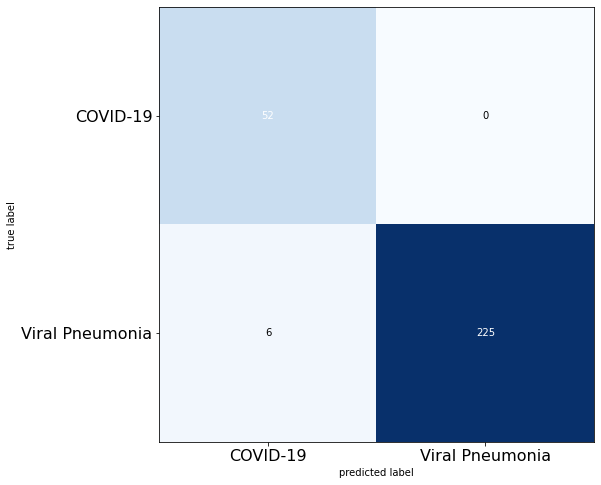

In [26]:
import matplotlib.pyplot as plt
cm  = confusion_matrix(labels, pred)
plt.figure()
plot_confusion_matrix(cm,figsize=(12,8), hide_ticks=True, cmap=plt.cm.Blues)
plt.xticks(range(2), ['COVID-19', 'Viral Pneumonia'], fontsize=16)
plt.yticks(range(2), ['COVID-19', 'Viral Pneumonia'], fontsize=16)
plt.show()

In [0]:
recall = np.diag(cm) / np.sum(cm, axis = 1)
precision = np.diag(cm) / np.sum(cm, axis = 0)

In [28]:
print(recall)
print(precision)

[1.         0.97402597]
[0.89655172 1.        ]


In [0]:
print(np.mean(recall))
print(np.mean(precision))

0.9285714285714286
0.9890510948905109


In [0]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

In [0]:
model.save("covid-19.h5")